# Import libs

In [1]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Column dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9032258064516129, 0.7419354838709677, 0.8225806451612904, 0.7903225806451613, 0.7258064516129032, 0.7741935483870968, 0.8064516129032258, 0.8387096774193549, 0.7741935483870968, 0.7903225806451613, 0.8225806451612904, 0.7903225806451613, 0.7903225806451613, 0.8548387096774194, 0.7741935483870968, 0.7580645161290323, 0.8225806451612904, 0.7419354838709677, 0.8225806451612904, 0.8064516129032258]

Accuracy:
0.7975806451612903

Standard Deviation:
0.04095472234062782

Confusion Matrix:
    SL  NO  DH
SL  32   1   0
NO   0  16   1
DH   0   4   8
    NO  SL  DH
NO  13   0   9
SL   2  23   1
DH   4   0  10
    DH  SL  NO
DH   4   0   3
SL   1  31   0
NO   6   1  16
    NO  SL  DH
NO  16   1   1
SL   2  25   0
DH   8   1   8
    SL  DH  NO
SL  24   1   4
DH   0   8   9
NO   1   2  13
    DH  SL  NO
DH   8   0   6
SL   1  27   0
NO   5   2  13
    NO  SL  DH
NO  15   0   5
SL   3  27   0
DH   4   0   8
    SL  NO  DH
SL  33   1   0
NO 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,NO,DH
SL,27,1,0
NO,0,15,4
DH,0,5,7


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8548387096774194, 0.7258064516129032, 0.6935483870967742, 0.7580645161290323, 0.8064516129032258, 0.8225806451612904, 0.7741935483870968, 0.7580645161290323, 0.6612903225806451, 0.7741935483870968, 0.8064516129032258, 0.7258064516129032, 0.7580645161290323, 0.7419354838709677, 0.6935483870967742, 0.7419354838709677, 0.7419354838709677, 0.6451612903225806, 0.7903225806451613, 0.8387096774193549]

Accuracy:
0.7556451612903226

Standard Deviation:
0.054523524980275385

Confusion Matrix:
    SL  NO  DH
SL  29   4   0
NO   0  14   3
DH   0   2  10
    NO  SL  DH
NO  10   1  11
SL   3  21   2
DH   0   0  14
    DH  SL  NO
DH   6   0   1
SL   3  25   4
NO   9   2  12
    NO  SL  DH
NO  11   2   5
SL   1  24   2
DH   5   0  12
    SL  DH  NO
SL  23   1   5
DH   0  15   2
NO   1   3  12
    DH  SL  NO
DH  12   0   2
SL   1  25   2
NO   4   2  14
    NO  SL  DH
NO  12   0   8
SL   4  25   1
DH   1   0  11
    SL  NO  DH
SL  29   2   3
NO

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,NO,DH
SL,24,4,1
NO,0,12,6
DH,0,2,10


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.8870967741935484, 0.8225806451612904, 0.8387096774193549, 0.7258064516129032, 0.7419354838709677, 0.8225806451612904, 0.7580645161290323, 0.8387096774193549, 0.8064516129032258, 0.7580645161290323, 0.8064516129032258, 0.8225806451612904, 0.8225806451612904, 0.7741935483870968, 0.8225806451612904, 0.7580645161290323, 0.8225806451612904, 0.7580645161290323, 0.7903225806451613, 0.8225806451612904]

Accuracy:
0.7999999999999999

Standard Deviation:
0.039309863248238534

Confusion Matrix:
    SL  NO  DH
SL  32   1   0
NO   0  17   0
DH   0   6   6
    NO  SL  DH
NO  18   0   4
SL   2  24   0
DH   5   0   9
    DH  SL  NO
DH   4   0   3
SL   1  31   0
NO   4   2  17
    NO  SL  DH
NO  16   1   1
SL   2  25   0
DH  11   2   4
    SL  DH  NO
SL  26   0   3
DH   0   9   8
NO   1   4  11
    DH  SL  NO
DH   8   1   5
SL   0  28   0
NO   3   2  15
    NO  SL  DH
NO  13   0   7
SL   2  28   0
DH   4   2   6
    SL  NO  DH
SL  32   1   1

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,SL,NO,DH
SL,27,1,0
NO,0,15,3
DH,0,5,6


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.8709677419354839, 0.7580645161290323, 0.7580645161290323, 0.8064516129032258, 0.8548387096774194, 0.8064516129032258, 0.8387096774193549, 0.7741935483870968, 0.7419354838709677, 0.8225806451612904, 0.8709677419354839, 0.8064516129032258, 0.8225806451612904, 0.8225806451612904, 0.8064516129032258, 0.8064516129032258, 0.8709677419354839, 0.7741935483870968, 0.8709677419354839, 0.8709677419354839]

Accuracy:
0.817741935483871

Standard Deviation:
0.04083544806829731

Confusion Matrix:
    SL  NO  DH
SL  32   1   0
NO   2  13   2
DH   0   3   9
    NO  SL  DH
NO   8   3  11
SL   0  26   0
DH   0   1  13
    DH  SL  NO
DH   5   0   2
SL   0  31   1
NO   7   5  11
    NO  SL  DH
NO  13   2   3
SL   0  27   0
DH   4   3  10
    SL  DH  NO
SL  28   0   1
DH   0  13   4
NO   2   2  12
    DH  SL  NO
DH   9   1   4
SL   0  28   0
NO   4   3  13
    NO  SL  DH
NO  14   1   5
SL   1  29   0
DH   2   1   9
    SL  NO  DH
SL  33   1 

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,SL,NO,DH
SL,28,0,0
NO,1,13,5
DH,0,2,8


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.8870967741935484, 0.7741935483870968, 0.8225806451612904, 0.8387096774193549, 0.8225806451612904, 0.8064516129032258, 0.8548387096774194, 0.7903225806451613, 0.7903225806451613, 0.8225806451612904, 0.8387096774193549, 0.7580645161290323, 0.8548387096774194, 0.8225806451612904, 0.8225806451612904, 0.8064516129032258, 0.8225806451612904, 0.8064516129032258, 0.8225806451612904, 0.8870967741935484]

Accuracy:
0.8225806451612903

Standard Deviation:
0.03185228654537339

Confusion Matrix:
    SL  NO  DH
SL  31   2   0
NO   0  15   2
DH   0   3   9
    NO  SL  DH
NO  11   2   9
SL   0  26   0
DH   2   1  11
    DH  SL  NO
DH   4   1   2
SL   0  31   1
NO   5   2  16
    NO  SL  DH
NO  15   1   2
SL   0  27   0
DH   5   2  10
    SL  DH  NO
SL  28   0   1
DH   0   9   8
NO   1   1  14
    DH  SL  NO
DH   9   2   3
SL   0  28   0
NO   4   3  13
    NO  SL  DH
NO  15   0   5
SL   0  30   0
DH   3   1   8
    SL  NO  DH
SL  33   1   0
N

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,SL,NO,DH
SL,28,0,0
NO,0,14,4
DH,0,4,7


# Choosing two columns from the last X_train and X_test to plot decision surface

In [15]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
135  77.12  30.35
218  51.62  15.97
160  92.03  35.39
73   55.51  20.10
45   50.91  23.02
..     ...    ...
217  38.13   6.56
53   30.15  11.92
294  46.24  10.06
134  52.20  17.21
65   83.93  41.29

[248 rows x 2 columns]
Test dataset:
         0      1
153  57.29  15.15
166  56.99   6.87
110  63.90  13.71
187  60.42   5.27
5    40.25  13.92
..     ...    ...
87   44.91  10.22
275  67.29  16.72
179  68.72  49.43
297  45.58  18.76
62   44.53   9.43

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [16]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

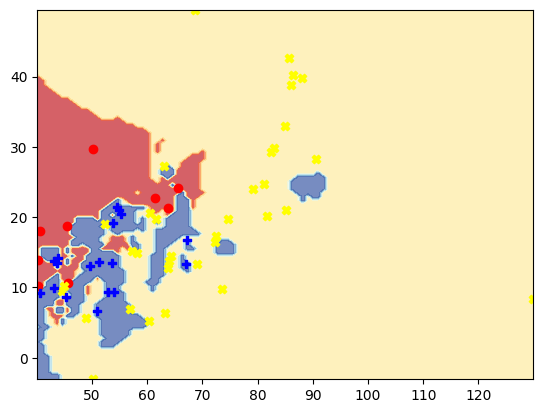

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

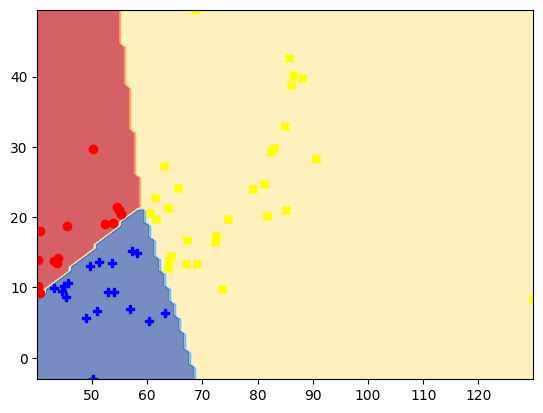

In [18]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting kmeans decision surface

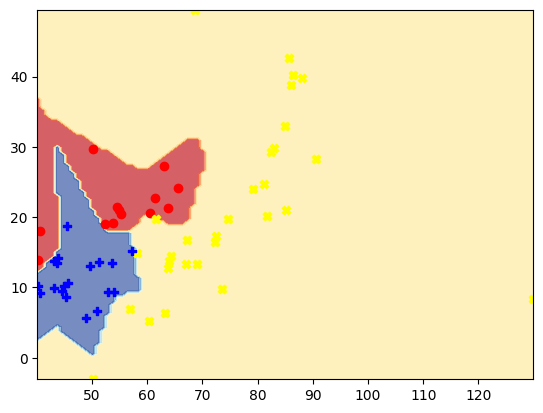

In [20]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

dh = np.where(kmeans_y_pred == 'DH')
sl = np.where(kmeans_y_pred == 'SL')
no = np.where(kmeans_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting naive bayes decision surface

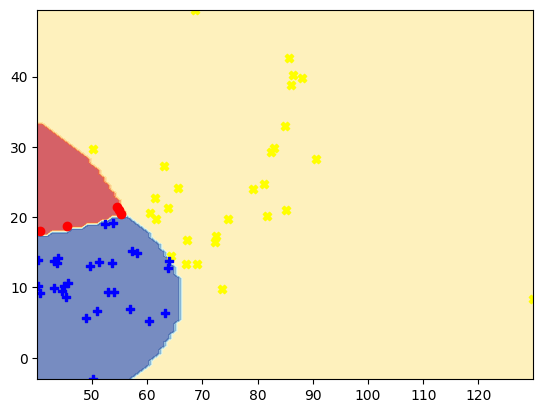

In [21]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

dh = np.where(nb_y_pred == 'DH')
sl = np.where(nb_y_pred == 'SL')
no = np.where(nb_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting bayes decision surface

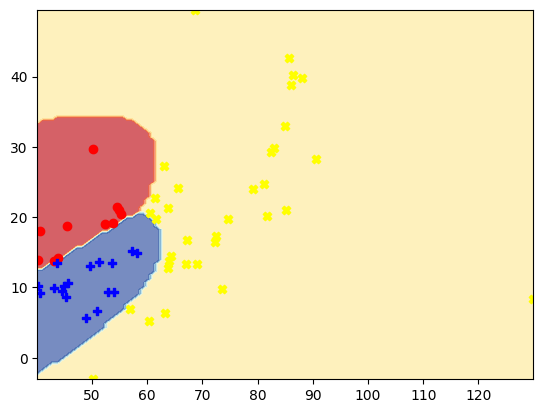

In [22]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_y_pred == 'DH')
sl = np.where(b_y_pred == 'SL')
no = np.where(b_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()